In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import dust
import WD01
import sigma_scat as ss

In [3]:
agra = np.logspace(np.log10(0.005), np.log10(0.8), 100)
asil = np.logspace(np.log10(0.005), np.log10(0.4), 100) # um

wd_gra = WD01.make_WD01_Dustspectrum(R_V=3.1, bc=6.0, type='Graphite', rad=agra)
wd_sil = WD01.make_WD01_Dustspectrum(R_V=3.1, bc=6.0, type='Silicate', rad=asil)

R_V   =  3.1
bc    =  6.0
alpha =  -1.54
beta  =  -0.165
a_t   =  0.0107
a_c   =  0.428
C     =  9.99e-12
R_V   =  3.1
bc    =  6.0
alpha =  -2.21
beta  =  0.3
a_t   =  0.164
a_c   =  0.1
C     =  1e-13


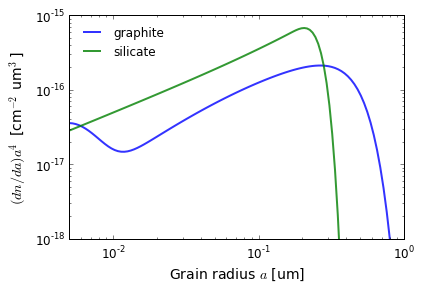

In [4]:
ax = plt.subplot(111)
plt.plot(wd_gra.a, wd_gra.nd*wd_gra.a**4, 'b-', lw=2, alpha=0.8, label='graphite')
plt.plot(wd_sil.a, wd_sil.nd*wd_sil.a**4, 'g-', lw=2, alpha=0.8, label='silicate')

ax.tick_params(labelsize=12)
plt.xlabel('Grain radius $a$ [um]', size=14)
plt.ylabel(r'$(dn/da) a^4$ [cm$^{-2}$ um$^3$]', size=14)
plt.legend(loc='upper left', frameon=False)

plt.loglog()
plt.ylim(1.e-18, 1.e-15)
plt.xlim(0.005,1.0)

#plt.savefig("WD01_dist.pdf", format='pdf')

In [5]:
ENERGY = np.logspace(-1,1,1000)
MDUST  = 1.e-4 # g cm^-2

In [6]:
def _gra_tau(E):
    result = ss.Kappascat(E=E, dist=wd_gra, scatm=ss.makeScatmodel('Mie','Graphite')).kappa*MDUST
    return result

def _sil_tau(E):
    result = ss.Kappascat(E=E, dist=wd_sil, scatm=ss.makeScatmodel('Mie','Silicate')).kappa*MDUST
    return result

In [7]:
%%time
tsca_gra = ss.Kappascat(E=ENERGY, dist=wd_gra, scatm=ss.makeScatmodel('Mie','Graphite')).kappa * MDUST

CPU times: user 13min 58s, sys: 6.88 s, total: 14min 5s
Wall time: 14min 9s


In [8]:
%%time
tsca_sil = ss.Kappascat(E=ENERGY, dist=wd_sil, scatm=ss.makeScatmodel('Mie','Silicate')).kappa * MDUST

CPU times: user 3min 58s, sys: 1.39 s, total: 3min 59s
Wall time: 3min 59s


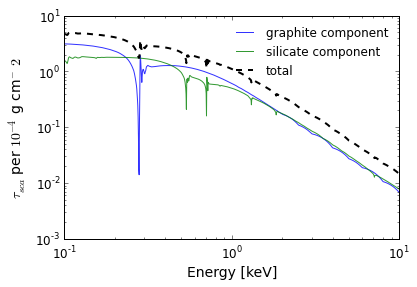

In [9]:
tsca_tot = tsca_gra + tsca_sil

ax = plt.subplot(111)
plt.plot(ENERGY, tsca_gra, 'b-', alpha=0.8, label='graphite component')
plt.plot(ENERGY, tsca_sil, 'g-', alpha=0.8, label='silicate component')
plt.plot(ENERGY, tsca_tot, 'k--', lw=2, label='total')

ax.tick_params(labelsize=12)
plt.xlabel('Energy [keV]', size=14)
plt.ylabel(r'$\tau_{sca}$ per $10^{-4}$ g cm$^-2$', size=14)

plt.legend(loc='upper right', frameon=False)
plt.loglog()

#plt.savefig("WD01_tau.pdf", format='pdf')

## Get raw cross-section

In [10]:
from scipy.integrate import trapz

In [11]:
def integrate_sigmascat(energy, dist, scatm):
    dnda = dict(zip(dist.a, dist.nd))
    sigs = [dnda[A] * ss.Sigmascat(scatm=scatm, E=energy, a=A).sigma for A in dist.a]
    return trapz(sigs, dist.a, axis=0)

In [12]:
%%time
sigma_gra = integrate_sigmascat(ENERGY, wd_gra, ss.makeScatmodel('Mie','Graphite'))

CPU times: user 13min 52s, sys: 6.39 s, total: 13min 58s
Wall time: 14min 2s


In [13]:
%%time
sigma_sil = integrate_sigmascat(ENERGY, wd_sil, ss.makeScatmodel('Mie','Silicate'))

CPU times: user 3min 58s, sys: 1.25 s, total: 4min
Wall time: 4min


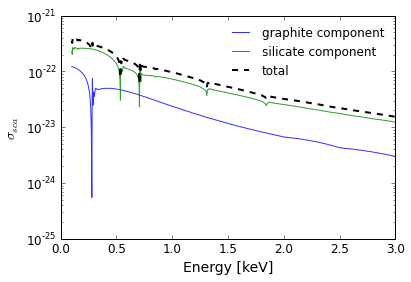

In [20]:
sigma_tot = sigma_gra + sigma_sil

ax = plt.subplot(111)
plt.plot(ENERGY, sigma_gra, 'b-', alpha=0.8, label='graphite component')
plt.plot(ENERGY, sigma_sil, 'g-', alpha=0.8, label='silicate component')
plt.plot(ENERGY, sigma_tot, 'k--', lw=2, label='total')

ax.tick_params(labelsize=12)
plt.xlabel('Energy [keV]', size=14)
plt.ylabel(r'$\sigma_{sca}$', size=14)

plt.legend(loc='upper right', frameon=False)
plt.semilogy()
plt.xlim(0,3)

#plt.savefig("WD01_sigma.pdf", format='pdf')